In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
%pylab inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#устраним ошибки со шрифтами
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import *
from sklearn.metrics import *
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('train.csv')

In [3]:
#test = pd.read_csv('test.csv')

In [4]:
#a = train[[ 'MSSubClass', 'LotFrontage', 'LotArea',  'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating','HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC','Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]
#print(a.corr())


In [5]:
y_train = train['SalePrice']

In [6]:
del train['SalePrice']

In [5]:
y_train.value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
176000     8
170000     8
129000     8
230000     8
250000     8
200000     8
141000     8
215000     8
148000     7
173000     7
          ..
64500      1
326000     1
277500     1
259000     1
254900     1
131400     1
181134     1
142953     1
245350     1
121600     1
337500     1
228950     1
274000     1
317000     1
154500     1
52000      1
107400     1
218000     1
104000     1
68500      1
94000      1
466500     1
410000     1
437154     1
219210     1
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

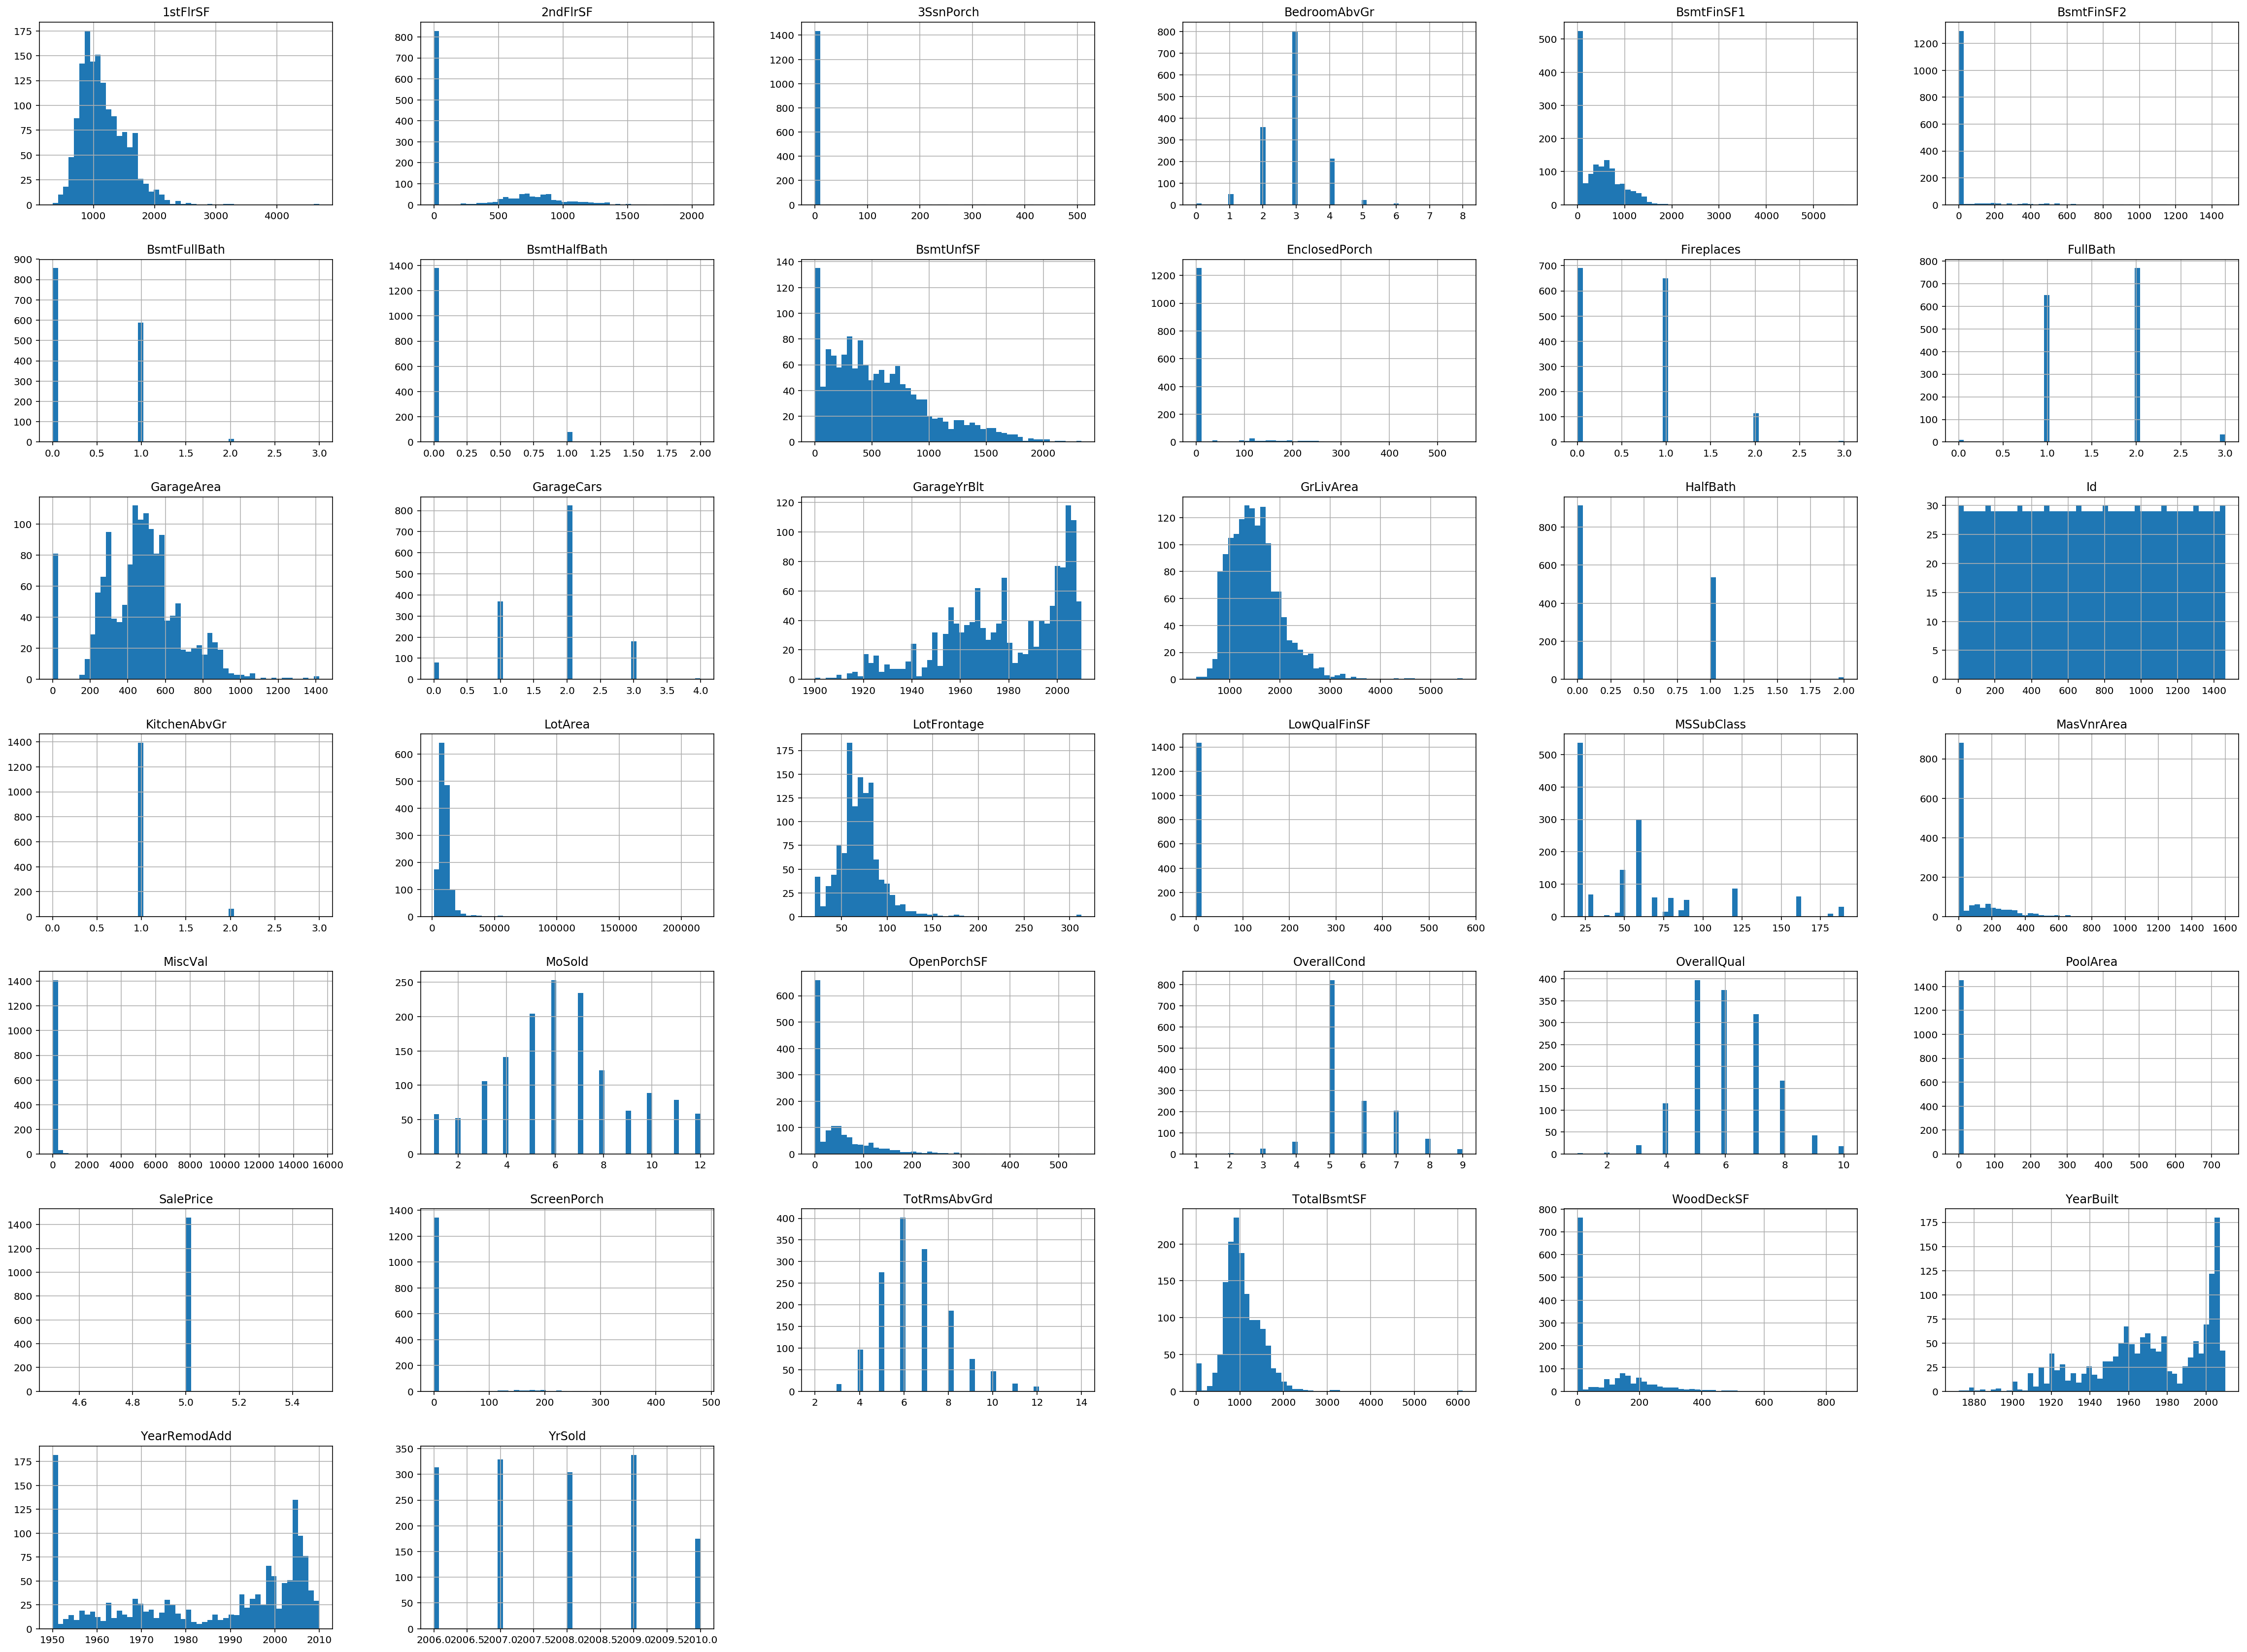

In [21]:
_ = train.hist(bins=50, figsize=(40,30))

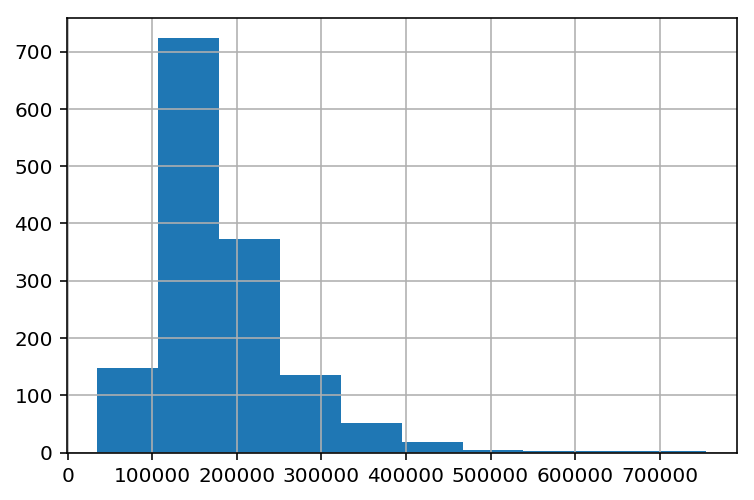

In [8]:
y_train.hist()

In [10]:
z = np.log(y_train)

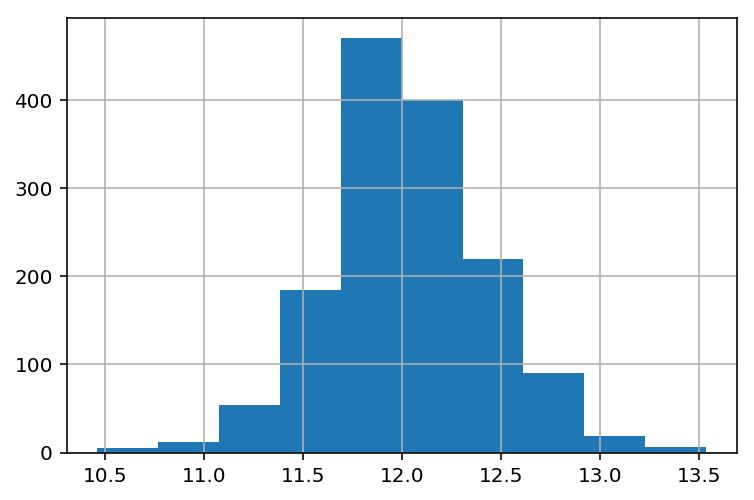

In [11]:
z.hist()

In [23]:
from sklearn.linear_model import LinearRegression
#regression = LinearRegression()
#regression.fit(X_train, Y_train)
#regression.score(X_train, Y_train)

In [230]:
X_train.shape

(1022, 167)

In [7]:
del train['Id']

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, y_train, test_size = 0.3, random_state = 0 )

In [204]:
X_test.drop(unique_list, axis=1, inplace=True)
X_train.drop(unique_list, axis=1, inplace=True)

In [205]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=1000, max_depth=100, n_jobs=-1 )

clf_rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [298]:
y_pred_clf_rf = clf_rf.predict(X_test)
rms_clf_rf = sqrt(mean_squared_error(Y_test, y_pred_clf_rf))
rms_clf_rf

35739.62850890224

In [206]:
imp = pd.Series(clf_rf.feature_importances_, index=X_train.columns)
imp.sort_values(ascending=False)

LotArea                 0.031085
GrLivArea               0.030968
1stFlrSF                0.030146
TotalBsmtSF             0.029585
BsmtUnfSF               0.029410
GarageArea              0.028860
LotFrontage             0.027307
YearBuilt               0.026541
GarageYrBlt             0.025952
MoSold                  0.025302
YearRemodAdd            0.024566
BsmtFinSF1              0.024079
OpenPorchSF             0.021514
WoodDeckSF              0.019873
YrSold                  0.018358
TotRmsAbvGrd            0.018356
MasVnrArea              0.017819
2ndFlrSF                0.016876
OverallQual             0.015865
OverallCond             0.013217
BedroomAbvGr            0.012685
MSSubClass              0.011804
Fireplaces              0.010253
GarageCars              0.008476
EnclosedPorch           0.008230
LotShape_IR1            0.008067
BsmtFullBath            0.008005
BsmtFinSF2              0.007337
GarageFinish_RFn        0.006943
ScreenPorch             0.006934
          

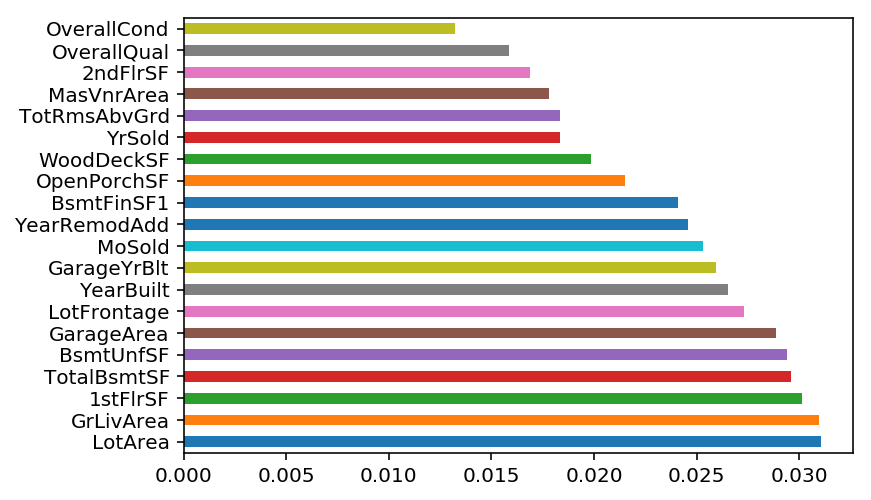

In [207]:
imp.sort_values(ascending=False).iloc[:20].plot(kind='barh');

In [208]:
imp_rf = pd.DataFrame(clf_rf.feature_importances_, index=X_train.columns)
imp_rf= imp_rf.reset_index()
imp_rf.columns=['feature','goodby']
imp_rf.sort_values(by='goodby')

,feature,goodby
108,Foundation_Slab,0.001132
100,ExterQual_Ex,0.001148
126,BsmtFinType2_ALQ,0.001162
36,MSZoning_RH,0.001195
164,SaleCondition_Family,0.001201
71,Condition1_PosN,0.001240
144,FireplaceQu_Ex,0.001282
74,BldgType_Duplex,0.001312
156,PavedDrive_P,0.001315
103,ExterCond_Fa,0.001370


In [209]:
rff = []
for i in range(288):
    if   -0.001 < imp_rf.goodby[i] < 0.001 :
        rff += [imp_rf.feature[i]]
rff

KeyError: 167

X_test.drop(unique_list, axis=1, inplace=True)

In [210]:
X_train.shape

(1022, 167)

In [211]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)
regression.score(X_train, Y_train)

0.9120001535210671

In [212]:
regression.score(X_test, Y_test)

0.7871487368637179

In [297]:
y_pred_regression = regression.predict(X_test)
rms_regression = sqrt(mean_squared_error(Y_test, y_pred_regression))
rms_regression

38013.75282224051

In [266]:
from sklearn.linear_model import Ridge
rd = Ridge(alpha=150)
rd.fit(X_train, Y_train)

Ridge(alpha=150, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [267]:
rd.score(X_test, Y_test)

0.8018583386337874

In [296]:
y_pred_rd = rd.predict(X_test)
rms_rd = sqrt(mean_squared_error(Y_test, y_pred_rd))
rms_rd

36676.72345116751

In [215]:
imp_rd = pd.Series(rd.coef_, index=X_train.columns)
imp_rd.sort_values(ascending=False)

GrLivArea                12854.159564
OverallQual              11496.112330
2ndFlrSF                 10306.885137
TotalBsmtSF               6141.849129
KitchenQual_Ex            6025.091585
1stFlrSF                  5794.027322
Condition1_Norm           5786.789316
BsmtQual_Ex               5611.758162
YearBuilt                 5324.252906
OverallCond               5295.773217
TotRmsAbvGrd              5223.440605
Neighborhood_NoRidge      5051.627861
LotArea                   4987.502038
LandSlope_Mod             4709.651542
BsmtFinSF1                4310.211390
MasVnrArea                4247.136905
LandSlope_Gtl             3914.638942
SaleType_New              3838.873706
GarageArea                3682.683642
FullBath                  3593.929836
Functional_Typ            3500.650370
BsmtExposure_Gd           3457.963666
GarageCond_TA             3377.225402
ExterQual_Ex              3362.159559
Neighborhood_Crawfor      3038.433584
BsmtFullBath              2806.017857
MasVnrType_N

In [216]:
imp_rd = pd.DataFrame(rd.coef_, index=X_train.columns)
imp_rd= imp_rd.reset_index()
imp_rd.columns=['feature','goodby']
imp_rd.sort_values(by='goodby')

,feature,goodby
152,GarageQual_TA,-5842.347457
59,Neighborhood_NAmes,-5752.404910
166,SaleCondition_Partial,-5646.714961
55,Neighborhood_Edwards,-5481.942499
162,SaleType_WD,-4835.169332
163,SaleCondition_Abnorml,-4791.167928
58,Neighborhood_Mitchel,-4233.970049
151,GarageQual_Fa,-3925.895564
63,Neighborhood_OldTown,-3829.610422
79,HouseStyle_2Story,-3810.284820


In [217]:
rdd = []
for i in range(288):
    if   -100 < imp_rd.goodby[i] < 100 :
        rdd += [imp_rd.feature[i]]
rdd

KeyError: 167

In [256]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=175)
lasso.fit(X_train, Y_train)

Lasso(alpha=175, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [257]:
lasso.score(X_test, Y_test)

0.7994512602418582

print(lasso.intercept_)
print(lasso.coef_)

In [294]:
y_pred_lasso = lasso.predict(X_test)
rms = sqrt(mean_squared_error(Y_test, y_pred_lasso))
rms

36898.83030278812

In [268]:
imp_lasso = pd.Series(lasso.coef_, index=X_train.columns)
imp_lasso.sort_values(ascending=False)

GrLivArea                23578.748551
OverallQual              12427.408246
BsmtQual_Ex               7124.179124
KitchenQual_Ex            6085.177906
Neighborhood_NoRidge      5867.531267
TotalBsmtSF               5755.456977
OverallCond               5147.746709
YearBuilt                 4746.893904
LotArea                   4398.051620
Condition1_Norm           4386.614584
TotRmsAbvGrd              4171.173179
MasVnrArea                4020.698767
GarageArea                3972.212818
BsmtExposure_Gd           3521.818541
Neighborhood_Crawfor      3488.003410
Functional_Typ            3431.529196
BsmtFinSF1                3308.692654
LandSlope_Mod             3159.736556
FullBath                  3081.136010
ExterQual_Ex              3005.461874
BldgType_1Fam             2921.914716
BsmtFullBath              2581.097911
Neighborhood_NridgHt      2554.992312
Exterior1st_BrkFace       2449.651107
LotConfig_CulDSac         2383.433558
WoodDeckSF                2292.712437
LandSlope_Gt

In [269]:
imp_lasso2 = pd.DataFrame(lasso.coef_, index=X_train.columns)
imp_lasso2= imp_lasso2.reset_index()
imp_lasso2.columns=['feature','goodby']
imp_lasso2.sort_values(by='goodby')


,feature,goodby
55,Neighborhood_Edwards,-3951.860280
59,Neighborhood_NAmes,-3659.374154
21,KitchenAbvGr,-3426.165746
162,SaleType_WD,-3402.579492
152,GarageQual_TA,-3196.674062
58,Neighborhood_Mitchel,-3168.923484
163,SaleCondition_Abnorml,-3002.674066
151,GarageQual_Fa,-2510.909322
79,HouseStyle_2Story,-2354.860301
57,Neighborhood_IDOTRR,-2300.804366


In [272]:
imp_lasso2 = pd.DataFrame(lasso.coef_, index=X_train.columns)
imp_lasso2= imp_lasso2.reset_index()
imp_lasso2.columns=['feature','goodby']
imp_lasso2.sort_values(by='goodby')
la = []
for i in range(167):
    if   -0.000001 < imp_lasso2.goodby[i] < 0.000001 :
        la += [imp_lasso2.feature[i]]
la

['BsmtUnfSF',
 '1stFlrSF',
 'GarageYrBlt',
 'OpenPorchSF',
 'EnclosedPorch',
 'MiscVal',
 'LandContour_HLS',
 'LandContour_Lvl',
 'LotConfig_Inside',
 'Neighborhood_ClearCr',
 'Neighborhood_Somerst',
 'Condition1_Feedr',
 'BldgType_Duplex',
 'BldgType_TwnhsE',
 'HouseStyle_SLvl',
 'Exterior1st_Plywood',
 'Exterior1st_WdShing',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'ExterQual_Gd',
 'ExterCond_Fa',
 'ExterCond_TA',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'BsmtQual_TA',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtFinType1_ALQ',
 'BsmtFinType2_Unf',
 'HeatingQC_TA',
 'CentralAir_Y',
 'Electrical_FuseA',
 'KitchenQual_Gd',
 'Functional_Min2',
 'GarageType_Attchd',
 'GarageCond_Fa',
 'PavedDrive_N',
 'PavedDrive_Y',
 'MiscFeature_Shed',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial']

In [273]:
len(la)

45

In [299]:
from sklearn.metrics import r2_score
rss = np.sum((lasso.predict(X_test) - Y_test) ** 2)
print("RSS:", rss)
print("RSE:", np.sqrt(rss / (X_train.shape[0] - 1 - 1)))
print("R^2:", r2_score(lasso.predict(X_test), Y_test))

RSS: 596347370838.7123
RSE: 24179.625413475544
R^2: 0.7884345793847611


In [361]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(X_train, Y_train)
# display the relative importance of each attribute
#print(et.feature_importances_)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [225]:
imp_et = pd.Series(et.feature_importances_, index=X_train.columns)
imp_et.sort_values(ascending=False)

MoSold                  0.023152
BsmtUnfSF               0.023152
GrLivArea               0.022384
YearBuilt               0.021879
TotalBsmtSF             0.021777
LotArea                 0.021452
GarageArea              0.021235
TotRmsAbvGrd            0.021075
1stFlrSF                0.020972
GarageYrBlt             0.020922
LotFrontage             0.020441
OverallQual             0.019099
YrSold                  0.018721
WoodDeckSF              0.018374
YearRemodAdd            0.018325
OpenPorchSF             0.018216
BsmtFinSF1              0.016618
BedroomAbvGr            0.013901
MasVnrArea              0.012968
OverallCond             0.012266
2ndFlrSF                0.011865
GarageCars              0.011841
Fireplaces              0.011768
BsmtFullBath            0.011502
RoofStyle_Gable         0.011419
LotConfig_Inside        0.011221
MSSubClass              0.010675
GarageFinish_RFn        0.010154
BsmtExposure_No         0.010133
GarageFinish_Fin        0.009819
          

In [300]:
y_pred_et = et.predict(X_test)
rms_et = sqrt(mean_squared_error(Y_test, y_pred_et))
rms_et

AttributeError: 'list' object has no attribute 'predict'

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
5# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X_train, Y_train)
6# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

imp_rfe = pd.Series(rfe.feature_importances_, index=X_train.columns)
imp_rfe.sort_values(ascending=False)

In [275]:
imp_et = pd.DataFrame(et.feature_importances_, index=X_train.columns)
imp_et= imp_et.reset_index()
imp_et.columns=['feature','goodby']
imp_et.sort_values(by='goodby')

,feature,goodby
71,Condition1_PosN,0.000524
74,BldgType_Duplex,0.000773
164,SaleCondition_Family,0.000814
156,PavedDrive_P,0.000888
14,LowQualFinSF,0.000928
36,MSZoning_RH,0.000944
103,ExterCond_Fa,0.000969
127,BsmtFinType2_BLQ,0.000983
126,BsmtFinType2_ALQ,0.000998
146,FireplaceQu_Po,0.001001


In [278]:
et = []
for i in range(167):
    if   -0.001 < imp_et.goodby[i] < 0.001 :
        et += [imp_et.feature[i]]
et

['LowQualFinSF',
 'MSZoning_RH',
 'Condition1_PosN',
 'BldgType_Duplex',
 'ExterCond_Fa',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'PavedDrive_P',
 'SaleCondition_Family']

In [319]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=210)
rfr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=210,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [302]:
imp_rfr = pd.Series(rfr.feature_importances_, index=X_train.columns)
imp_rfr.sort_values(ascending=False)

OverallQual             5.149858e-01
GrLivArea               1.272796e-01
BsmtFinSF1              3.710736e-02
1stFlrSF                2.985083e-02
GarageCars              2.852020e-02
TotalBsmtSF             2.324637e-02
GarageArea              2.028818e-02
MasVnrArea              2.020031e-02
YearBuilt               1.821083e-02
LotArea                 1.777851e-02
2ndFlrSF                1.465754e-02
BsmtQual_Ex             1.427907e-02
FullBath                9.705249e-03
MoSold                  9.449256e-03
OpenPorchSF             8.720996e-03
TotRmsAbvGrd            8.625146e-03
LotFrontage             6.609084e-03
YearRemodAdd            5.781568e-03
WoodDeckSF              5.421852e-03
OverallCond             5.070941e-03
Fireplaces              4.971606e-03
BsmtUnfSF               4.906630e-03
LandSlope_Gtl           3.951639e-03
GarageYrBlt             3.422576e-03
BsmtQual_Gd             2.935752e-03
KitchenQual_Ex          2.826304e-03
LotShape_IR1            2.699751e-03
B

In [320]:
y_pred_rfr = rfr.predict(X_test)
rms = sqrt(mean_squared_error(Y_test, y_pred_rfr))
rms

31161.98444960531

In [321]:
rfr.score(X_test, Y_test)

0.8569641332911021

In [387]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

class DjStacking(BaseEstimator, ClassifierMixin):  


    def __init__(self, models, ens_model):
        self.models = models
        self.ens_model = ens_model
        self.n = len(models)
        self.valid = None
        
    def fit(self, X, y=None, p=0.7, cv=3, err=0.001, random_state=None):
        if (p > 0):
            train, valid, y_train, y_valid = train_test_split(X_train, y, test_size=p, random_state=random_state)
            
            self.valid = np.zeros((valid.shape[0], self.n))
            for t, clf in enumerate(self.models):
                clf.fit(train, y_train)
                self.valid[:, t] = clf.predict(valid)
                
            self.ens_model.fit(self.valid, y_valid)
            
        return self
    


    def predict(self, X, y=None):

        X_meta = np.zeros((X.shape[0], self.n))
        
        for t, clf in enumerate(self.models):
            X_meta[:, t] = clf.predict(X)
        
        selfish = self.ens_model.predict(X_meta)
        
        return (selfish)

In [398]:
models = [clf_rf, lasso, rfr, rd ] # , rf3
ens_model = RandomForestRegressor()
s1 = DjStacking(models, ens_model)
s1.fit(X_train, Y_train)

DjStacking(ens_model=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
      models=[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fractio...fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)])

In [399]:
y_pred_s1= s1.predict(X_test)
rms_s1 = sqrt(mean_squared_error(Y_test, y_pred_s1))
rms_s1

31025.555878699513

In [407]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(n_estimators=20, base_estimator=clf_rf, n_jobs=-1)
bag_clf.fit(X_train, Y_train)

KeyboardInterrupt: 

In [406]:
y_pred_bag= bag_clf.predict(X_test)
rms_bag = sqrt(mean_squared_error(Y_test, y_pred_bag))
rms_bag

Process ForkPoolWorker-48:
Process ForkPoolWorker-45:
Process ForkPoolWorker-47:
Process ForkPoolWorker-46:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):


KeyboardInterrupt: 

In [433]:
def get_meta_features(clf, X_train, Y_train, X_test, stack_cv):
    meta_train = np.zeros_like(Y_train, dtype=float)
    meta_test = np.zeros_like(Y_test, dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, Y_train)):
        
        clf.fit(X_train.iloc[train_ind], Y_train.iloc[train_ind])
        meta_train[test_ind] = clf.predict(X_train.iloc[test_ind])[:, 1]
        meta_test += clf.predict(X_test)[:, 1]
    
    return meta_train, meta_test / stack_cv.n_splits

In [434]:
class MeanClassifier():
    def __init__(self, col):
        self._col = col
        
    def fit(self, X, y):
        self._y_mean = y.mean()
        self._means = y.groupby(X[self._col].astype(str)).mean()

    def predict_proba(self, X):
        new_feature = X[self._col].astype(str)\
            .map(self._means.to_dict())\
            .fillna(self._y_mean)
        return np.stack([1-new_feature, new_feature], axis=1)

In [410]:
from sklearn.svm import LinearSVC

In [421]:
clf_svm = LinearSVC(C=100)    
clf_svm.fit(X_train, Y_train)

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [422]:
y_pred_clf_svm= clf_svm.predict(X_test)
rms_clf_svm = sqrt(mean_squared_error(Y_test, y_pred_clf_svm))
rms_clf_svm

77165.26311927618

In [423]:
rfr.score(X_test, Y_test)

0.807934351065991

In [435]:
from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=10, random_state=555)

meta_train = []
meta_test = []
col_names = []

print('mean features...')
for c in range(167):
    clf = MeanClassifier(c)
    
    meta_tr, meta_te = get_meta_features(clf, X_train, Y_train, X_test, stack_cv)

    meta_train.append(meta_tr)
    meta_test.append(meta_te)
    col_names.append('mean_pred_{}'.format(c))

print('SVM features...')
meta_tr, meta_te = get_meta_features(lasso, X_train, Y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('svm_pred')

print('LR features...')
meta_tr, meta_te = get_meta_features(rd, X_train, Y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('lr_pred')

print('RF features...')
meta_tr, meta_te = get_meta_features(clf_rf, X_train, Y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('rf_pred')

mean features...


KeyError: 0

In [430]:
X_train.shape

(1022, 167)

In [226]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=50000, random_state=100)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50000,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [284]:
imp2 = pd.Series(clf.feature_importances_, index=X_train.columns)
imp2.sort_values(ascending=False)

GrLivArea               0.043197
LotArea                 0.037408
1stFlrSF                0.036019
BsmtUnfSF               0.031468
BsmtFinSF1              0.028116
YearBuilt               0.027880
TotalBsmtSF             0.027680
LotFrontage             0.026992
MoSold                  0.026652
GarageYrBlt             0.026291
GarageArea              0.026222
WoodDeckSF              0.023386
OverallQual             0.022890
OpenPorchSF             0.022397
YrSold                  0.021377
BedroomAbvGr            0.017908
YearRemodAdd            0.015668
TotRmsAbvGrd            0.015415
BsmtFullBath            0.014967
MasVnrArea              0.014114
HeatingQC_Ex            0.012745
Fireplaces              0.012047
MSSubClass              0.011422
KitchenQual_TA          0.011127
BsmtExposure_No         0.011011
LotConfig_Corner        0.010350
GarageFinish_Fin        0.009818
Condition1_Norm         0.009295
OverallCond             0.008737
GarageCars              0.008556
          

In [8]:
cat_feat = list(train.dtypes[train.dtypes==object].index)

In [229]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print(lr)
# make predictions


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [233]:
expected = Y_test
predicted = lr.predict(X_test)
# summarize the fit of the model
#print(metrics.classification_report(expected, predicted))
#print(metrics.confusion_matrix(expected, predicted))

In [234]:
lr.score(X_train, Y_train)

0.9941291585127201

In [235]:
lr.score(X_test, Y_test)

0.01141552511415525

In [124]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
knn = KNeighborsClassifier()

In [125]:
knn.fit(X_train, Y_train)
expected = Y_test
predicted = lr.predict(X_test)

In [126]:
knn.score(X_test, Y_test)

0.0045662100456621

In [197]:
print(len(rff))
print(len(rdd))
print(len(la))
print(len(et))

104
29
263
93


In [198]:
new = rff + rdd +et

In [199]:
new

['PoolArea',
 'MSZoning_C (all)',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR3',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_FR3',
 'LandSlope_Sev',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_MeadowV',
 'Neighborhood_NPkVill',
 'Neighborhood_SWISU',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_PosA',
 'Condition1_RRAe',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_2fmCon',
 'HouseStyle_1.5Unf',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'RoofStyle_Flat',
 'RoofStyle_Gambrel',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_ClyTile',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsbShng',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkCom

In [200]:
new = sorted(set(new))

In [183]:
new

['2ndFlrSF',
 '3SsnPorch',
 'Alley_Grvl',
 'Alley_Pave',
 'BedroomAbvGr',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinSF2',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtUnfSF',
 'CentralAir_N',
 'CentralAir_Y',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condi

In [201]:
from operator import itemgetter
from itertools import groupby
unique_list = list(map(itemgetter(0), groupby(new)))

In [203]:
len(unique_list)

121

In [472]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=555)

In [477]:
results = cross_val_score(clf_rf, X_train, Y_train, cv=skf)
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 2.06%


In [475]:
results = cross_val_score(lasso, X_train, Y_train, cv=skf)
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 67.90%


In [476]:
print(results)

[0.16375568 0.84525004 0.77776032 0.82053818 0.54651962 0.82048718
 0.77835685]


In [486]:
models = [rfr, rd, lasso, regression, clf, clf_rf, clf_svm ]

In [487]:
for i in models:
    results = cross_val_score(models[i], X_train, Y_train, cv=skf)
    print("CV accuracy score: {:.2f}%".format(results.mean()*100))

TypeError: list indices must be integers or slices, not RandomForestRegressor